In [58]:
from groundedPL.codificacion import ToPropositionalLogic

parser = ToPropositionalLogic()

In [59]:
from groundedPL.logUtils import LogUtils
from typing import List, Tuple
NUM_FILAS = 8
NUM_COLUMNAS = 8
casillas = [(f"fila{x}", f"columna{y}")
            for x in range(NUM_FILAS) for y in range(NUM_COLUMNAS)]

#Deben haber 4 barcos en el mapa
def crear_regla_1():
    #Bn: Barco de n casillas (n=1,2,3,4)
    otoria_Bn = []
    for n in range(1, 5):
        for x in range(NUM_FILAS):
            for y in range(NUM_COLUMNAS):
                for i in range(n):
                    x2, y2 = x + i, y
                    if x2 < NUM_FILAS:
                        atomo = parser.to_nltk(f"En({x},{y}, {x2},{y2})")
                        otoria_Bn.append(atomo)
                for j in range(n):
                    x2, y2 = x, y + j
                    if y2 < NUM_COLUMNAS:
                        atomo = parser.to_nltk(f"En({x},{y}, {x2},{y2})")
                        otoria_Bn.append(atomo)
    # B1: Barco de 1 casilla 
    otoria_B1 = []
    for x in range(8):
        for y in range(8):
            x2, y2 = x, y
            formula = (f'En({x},{y}, {x2},{y2})')
            atomo = parser.to_nltk(formula)
            otoria_B1.append(atomo)
    B1 = LogUtils.Otoria(otoria_B1)

    # B2: Barco de 2 casillas (horizontal o vertical)
    otoria_B2_h = []
    for x in range(7):
        ytoria = []
        for y in range(8):
            x2, y2 = x + 1, y
            formula = (f'En({x},{y}, {x2},{y2})')
            atomo = parser.to_nltk(formula)
            ytoria.append(atomo)
        otoria_B2_h.append(LogUtils.Ytoria(ytoria))
    
    otoria_B2_v = []
    for y in range(7):
        ytoria = []
        for x in range(8):
            x2, y2 = x, y + 1 
            formula = (f'En({x},{y}, {x2},{y2})')
            atomo = parser.to_nltk(formula)
            ytoria.append(atomo)
        otoria_B2_v.append(LogUtils.Ytoria(ytoria))
    
    B2 = LogUtils.Otoria(otoria_B2_h + otoria_B2_v)

    # B3: Barco de 3 casillas (horizontal o vertical)
    otoria_B3_h = []
    for x in range(7):
        ytoria = []
        for y in range(8):
            x2, y2 = x + 2, y
            formula = (f'En({x},{y}, {x2},{y2})')
            atomo = parser.to_nltk(formula)     
            ytoria.append(atomo)
        otoria_B3_h.append(LogUtils.Ytoria(ytoria))
    
    otoria_B3_v = []
    for y in range(7):
        ytoria = []
        for x in range(8):
            x2, y2 = x, y + 2
            formula = (f'En({x},{y}, {x2},{y2})')
            atomo = parser.to_nltk(formula)
            ytoria.append(atomo)
        otoria_B3_v.append(LogUtils.Ytoria(ytoria))
    B3 = LogUtils.Otoria(otoria_B3_h + otoria_B3_v)
    
    # B4: Barco de 4 casillas (horizontal o vertical)
    otoria_B4_h = []
    for x in range(7):
        ytoria = []
        for y in range(8):
            x2, y2 = x + 3, y
            formula = (f'En({x},{y}, {x2},{y2})')
            atomo = parser.to_nltk(formula) 
            ytoria.append(atomo)
        otoria_B4_h.append(LogUtils.Ytoria(ytoria))
    
    otoria_B4_v = []
    for y in range(7):
        ytoria = []
        for x in range(8):
            x2, y2 = x, y + 3
            formula = (f'En({x},{y}, {x2},{y2})')
            atomo = parser.to_nltk(formula) 
            ytoria.append(atomo)
        otoria_B4_v.append(LogUtils.Ytoria(ytoria))
    
    B4 = LogUtils.Otoria(otoria_B4_h + otoria_B4_v)

    regla_1 = LogUtils.Ytoria([B1, B2, B3, B4])
    return regla_1

""" 
def igual(x, x2):
    if x == x2:
        return True
    else:
        return False
def igual(y, y2):
    if y == y2:
        return True
    else:
        return False


# Al posicionar un barco, todas sus casillas deben estar alineadas en la misma fila o columna
def crear_regla_2():
    Ytoria_vf = []
    for x in range(NUM_FILAS):
        for y in range(NUM_COLUMNAS):
            for x2 in range(NUM_FILAS):
                for y2 in range(NUM_COLUMNAS):
                    iguales = igual(x, y) | igual(x2, y2)
                    formula = (f'En({x},{y}, {x2},{y2}) > {iguales}')
                    atomo= parser.to_nltk(formula)
                    Ytoria_vf.append(atomo)
    regla_2 = LogUtils.Ytoria(Ytoria_vf)
    return regla_2
"""
def igual(x, x2):
    if x == x2:
        return True
    else:
        return False
def igual1(y, y2):
    if y == y2:
        return True
    else:
        return False
    
def crear_regla_2():
    Ytoria_vf = []
    for x in range(NUM_FILAS):
        for y in range(NUM_COLUMNAS):
            for x2 in range(NUM_FILAS):
                for y2 in range(NUM_COLUMNAS):
                    antecedente = parser.to_nltk(f"En({x},{y}, {x2},{y2})")
                    consecuente =  parser.to_nltk(f"Igual({igual})"), parser.to_nltk(f"Igual({igual1})")  
                    implicacion = LogUtils.Ytoria(antecedente, consecuente)
                    Ytoria_vf.append(implicacion)
    regla_2 = LogUtils.Ytoria(Ytoria_vf)  # Conjunción universal (∀)
    return regla_2

# Para todo barco definifo, todas las casillas entre su inicio y su fin deben estar ocupadas por el barco
"""def crear_regla_3():
    Yrotia_vf = []
    for x in range(NUM_FILAS):
        for y in range(NUM_COLUMNAS):
            for x2 in range(NUM_FILAS):
                for y2 in range(NUM_COLUMNAS):
                    if igual(x, x2) or igual(y, y2):  
                        antecedente = parser.to_nltk(f"En({x},{y},{x2},{y2})")
                        cuerpo = []
                        if x == x2: 
                            y_start, y_end = sorted([y, y2])
                            for y in range(y_start, y_end + 1):
                                cuerpo.append(parser.to_nltk(f"Oc({x},{y})"))
                        else: 
                            x_start, x_end = sorted([x, x2])
                            for x in range(x_start, x_end + 1):
                                cuerpo.append(parser.to_nltk(f"Oc({x},{y})"))
                        consecuente = LogUtils.Ytoria(cuerpo)
                        implicacion = parser.to_nltk(f"{antecedente} > {consecuente}")
                        Yrotia_vf.append(implicacion)
    return LogUtils.Ytoria(Yrotia_vf)"""


def entre_casillas(x: int, y: int, x2: int, y2: int) -> List[Tuple[int, int]]:
    casillas = []
    if igual(x,x2): 
        inicio, fin = sorted([y, y2])
        for y in range(inicio, fin + 1):
            casillas.append((x, y))
    elif igual1(y,y2) :
        inicio, fin = sorted([x, x2])
        for x in range(inicio, fin + 1):
            casillas.append((x, y))
    return casillas

def crear_regla_3():
    Ytoria_vf = []
    for x in range(NUM_FILAS):
        for y in range(NUM_COLUMNAS):
            for x2 in range(NUM_FILAS):
                for y2 in range(NUM_COLUMNAS):
                    casillas_entre = entre_casillas(x, y, x2, y2)
                    if not casillas_entre: 
                        continue
                    antecedente = parser.to_nltk(f"En({x},{y}, {x2},{y2})")
                    ocupadas = []
                    for (u, v) in casillas_entre:
                        ocupadas.append(parser.to_nltk(f"Oc({u},{v})"))
                    consecuente = LogUtils.Ytoria(ocupadas) 
                    implicacion = parser.to_nltk(f"{antecedente} > {consecuente}")
                    Ytoria_vf.append(implicacion)
    regla_3 = LogUtils.Ytoria(Ytoria_vf) 
    return regla_3

#No puede haber barcos sobrepuestos
def crear_regla_4():
    condiciones = []

    # Función auxiliar para obtener casillas de un barco
    def casillas_barco(x, y, x2, y2):
        if x == x2:  # Barco horizontal
            return {(x, y) for y in range(min(y, y2), max(y, y2) + 1)}
        elif y == y2:  # Barco vertical
            return {(x, y) for x in range(min(x, x2), max(x, x2) + 1)}
        return set()

    # Generar pares únicos de barcos
    for barco1 in crear_regla_2():
        x, y, x2, y2 = barco1
        casillas_b1 = casillas_barco(x, y, x2, y2)
        for barco2 in crear_regla_2():
            u1, v1, u2, v2 = barco2
            # Evitar comparar el mismo barco
            if barco1 == barco2:
                continue
            casillas_b2 = casillas_barco(u1, v1, u2, v2)
            # Si hay intersección, crear regla
            if casillas_b1 & casillas_b2:
                antecedente1 = parser.to_nltk(f"En({x},{y}, {x2},{y2})")
                antecedente2 = parser.to_nltk(f"En({u1},{v1}, {u2},{v2})")
                # Negar la coexistencia de ambos barcos
                formula = LogUtils.Negacion(LogUtils.Ytoria([antecedente1, antecedente2]))
                condiciones.append(formula)

    regla_4 = LogUtils.Ytoria(condiciones)
    return regla_4

---

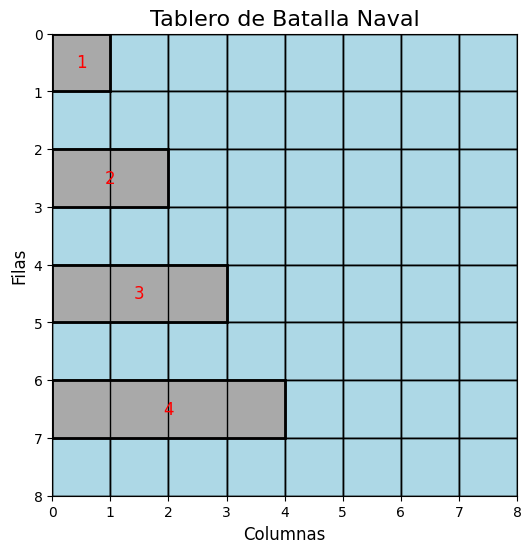

In [69]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

def visualizar_batalla_naval(barcos):
    fig, tablero = plt.subplots(figsize=(6, 6))
    tablero.set_xlim(0, 8) #Define el limite del tablero 
    tablero.set_ylim(0, 8)
    tablero.set_xticks(range(9))
    tablero.set_yticks(range(9))
    tablero.set_xticklabels(range(0, 9))
    tablero.set_yticklabels(range(0, 9))
    tablero.grid(True, color='black', linewidth=1)
    tablero.set_title("Tablero de Batalla Naval", fontsize=16)
    tablero.set_xlabel("Columnas", fontsize=12)
    tablero.set_ylabel("Filas", fontsize=12)

    # Colores
    agua_color = 'lightblue'
    barco_color = 'darkgray'
    borde_color = 'black'

    # Dibujar todas las casillas como agua primero
    for x in range(8):
        for y in range(8):
            rect = patches.Rectangle(
                (y, x), 1, 1, 
                facecolor=agua_color, 
                edgecolor=borde_color,
                linewidth=1
            )
            tablero.add_patch(rect)

    # Dibujar los barcos según su tamaño
    for nombre, posiciones in barcos.items():
        # Determinar si el barco es horizontal o vertical
        if len(posiciones) > 1:
            primera = posiciones[0]
            ultima = posiciones[-1]
            x1, y1 = int(primera[0].replace("fila", "")), int(primera[1].replace("columna", ""))
            x2, y2 = int(ultima[0].replace("fila", "")), int(ultima[1].replace("columna", ""))
            
            if x1 == x2:  # Barco horizontal
                width = len(posiciones)
                height = 1
                y1 = y2
            else:  # Barco vertical
                width = 1
                height = len(posiciones)
                y1 = y2
                
            rect = patches.Rectangle(
                (y, x1), width, height,
                facecolor=barco_color,
                edgecolor=borde_color,
                linewidth=2
            )
            tablero.add_patch(rect)
            
            # Texto con el tamaño del barco
            tablero.text(y + width/2, x1 + height/2, f"{len(posiciones)}",
                    ha='center', va='center', 
                    fontsize=12, color='red')
        else:  # Barco de 1 casilla
            x = int(posiciones[0][0].replace("fila", ""))
            y = int(posiciones[0][1].replace("columna", ""))
            rect = patches.Rectangle(
                (y, x), 1, 1,
                facecolor=barco_color,
                edgecolor=borde_color,
                linewidth=2
            )
            tablero.add_patch(rect)
            tablero.text(y + 0.5, x + 0.5, "1",
                    ha='center', va='center', 
                    fontsize=12, color='red')

    plt.gca().invert_yaxis()  # Para que fila 0 esté arriba
    plt.show()

# Ejemplo de uso con barcos de diferentes tamaños
I = {
    'B1': [("fila0", "columna0")],  # Barco tamaño 1
    'B2': [("fila2", "columna0"), ("fila2", "columna1")],  # Barco tamaño 2 vertical
    'B3': [("fila4", "columna0"), ("fila4", "columna1"), ("fila4", "columna2")],  # Barco tamaño 3 horizontal
    'B4': [("fila6", "columna0"), ("fila6", "columna1"), ("fila6", "columna2"), ("fila6", "columna3")]  # Barco tamaño 4 vertical
}
visualizar_batalla_naval(I)

# Interpretaciones y descriptores <a class="anchor" id="interp"></a>

([Volver al inicio](#inicio))



In [70]:
# Descriptor 1: En como coordenadas de los barcos
parser.debug = False

Entre = [pos for posiciones in I.values() for pos in posiciones]
En = {
    parser.parse(f"En({x},{y})"): (f"fila{x}", f"columna{y}") in Entre
    for x in range(NUM_FILAS) for y in range(NUM_COLUMNAS)
}
print(En)  # Para evitar errores de sintaxis

{'Ĉ': True, 'Ƙ': False, 'Ȩ': False, 'ʸ': False, '͈': False, 'Ϙ': False, 'Ѩ': False, 'Ӹ': False, 'Ĕ': False, 'Ƥ': False, 'ȴ': False, '˄': False, '͔': False, 'Ϥ': False, 'Ѵ': False, 'Ԅ': False, 'Ġ': True, 'ư': True, 'ɀ': False, 'ː': False, '͠': False, 'ϰ': False, 'Ҁ': False, 'Ԑ': False, 'Ĭ': False, 'Ƽ': False, 'Ɍ': False, '˜': False, 'ͬ': False, 'ϼ': False, 'Ҍ': False, 'Ԝ': False, 'ĸ': True, 'ǈ': True, 'ɘ': True, '˨': False, '\u0378': False, 'Ј': False, 'Ҙ': False, 'Ԩ': False, 'ń': False, 'ǔ': False, 'ɤ': False, '˴': False, '΄': False, 'Д': False, 'Ҥ': False, 'Դ': False, 'Ő': True, 'Ǡ': True, 'ɰ': True, '̀': True, 'ΐ': False, 'Р': False, 'Ұ': False, 'Հ': False, 'Ŝ': False, 'Ǭ': False, 'ɼ': False, '̌': False, 'Μ': False, 'Ь': False, 'Ҽ': False, 'Ռ': False}


In [72]:
# Descriptor 2: Oc como coordenadas individuales
parser.debug = False

ocupadas = [pos for posiciones in I.values() for pos in posiciones]
Oc = {
    parser.parse(f"Oc({x},{y})"): (f"fila{x}", f"columna{y}") in ocupadas
    for x in range(NUM_FILAS) for y in range(NUM_COLUMNAS)
}
print(Oc)

{'ĉ': True, 'ƙ': False, 'ȩ': False, 'ʹ': False, '͉': False, 'ϙ': False, 'ѩ': False, 'ӹ': False, 'ĕ': False, 'ƥ': False, 'ȵ': False, '˅': False, '͕': False, 'ϥ': False, 'ѵ': False, 'ԅ': False, 'ġ': True, 'Ʊ': True, 'Ɂ': False, 'ˑ': False, '͡': False, 'ϱ': False, 'ҁ': False, 'ԑ': False, 'ĭ': False, 'ƽ': False, 'ɍ': False, '˝': False, 'ͭ': False, 'Ͻ': False, 'ҍ': False, 'ԝ': False, 'Ĺ': True, 'ǉ': True, 'ə': True, '˩': False, '\u0379': False, 'Љ': False, 'ҙ': False, 'ԩ': False, 'Ņ': False, 'Ǖ': False, 'ɥ': False, '˵': False, '΅': False, 'Е': False, 'ҥ': False, 'Ե': False, 'ő': True, 'ǡ': True, 'ɱ': True, '́': True, 'Α': False, 'С': False, 'ұ': False, 'Ձ': False, 'ŝ': False, 'ǭ': False, 'ɽ': False, '̍': False, 'Ν': False, 'Э': False, 'ҽ': False, 'Ս': False}


In [62]:
from itertools import product

parser.debug = False

# Descriptor 3: Igual (adaptado como en Oc)
Igual_u = {
    parser.parse(f"Igual_u({x},{x2})"): x == x2
    for x, x2 in product(range(NUM_FILAS), repeat=2)
}

Igual_v = {
    parser.parse(f"Igual_v({y},{y2})"): y == y2
    for y, y2 in product(range(NUM_COLUMNAS), repeat=2)
}

print("Igual_u:", Igual_u)
print("Igual_v:", Igual_v)

Igual_u: {'Ċ': True, 'ƃ': False, 'Ǽ': False, 'ɵ': False, 'ˮ': False, 'ͧ': False, 'Ϡ': False, 'љ': False, 'ĕ': False, 'Ǝ': True, 'ȇ': False, 'ʀ': False, '˹': False, 'Ͳ': False, 'ϫ': False, 'Ѥ': False, 'Ġ': False, 'ƙ': False, 'Ȓ': True, 'ʋ': False, '̄': False, 'ͽ': False, '϶': False, 'ѯ': False, 'ī': False, 'Ƥ': False, 'ȝ': False, 'ʖ': True, '̏': False, 'Έ': False, 'Ё': False, 'Ѻ': False, 'Ķ': False, 'Ư': False, 'Ȩ': False, 'ʡ': False, '̚': True, 'Γ': False, 'Ќ': False, '҅': False, 'Ł': False, 'ƺ': False, 'ȳ': False, 'ʬ': False, '̥': False, 'Ξ': True, 'З': False, 'Ґ': False, 'Ō': False, 'ǅ': False, 'Ⱦ': False, 'ʷ': False, '̰': False, 'Ω': False, 'Т': True, 'қ': False, 'ŗ': False, 'ǐ': False, 'ɉ': False, '˂': False, '̻': False, 'δ': False, 'Э': False, 'Ҧ': True}
Igual_v: {'ċ': True, 'ƛ': False, 'ȫ': False, 'ʻ': False, '͋': False, 'ϛ': False, 'ѫ': False, 'ӻ': False, 'ė': False, 'Ƨ': True, 'ȷ': False, 'ˇ': False, '͗': False, 'ϧ': False, 'ѷ': False, 'ԇ': False, 'ģ': False, 'Ƴ': False, 'Ƀ': T

In [63]:
from itertools import combinations

parser.debug = False

BnCasillas = {}

for barco in I.values():
    for (x, y), (x2, y2) in combinations(barco, 2):
        # Están en misma fila o columna
        misma_fila = x == x2
        misma_columna = y == y2

        if not (misma_fila or misma_columna):
            continue  # ignorar si no están alineados

        # Verificar si todas están ocupadas
        if all((f"fila{x}", f"columna{y}") in barco for (x, y) in casillas):
            formula = parser.parse(f"BnCasillas({x},{y},{x2},{y2})")
            BnCasillas[formula] = True

print("BnCasillas:", BnCasillas)


BnCasillas: {}


---

# Visualización de interpretaciones <a class="anchor" id="visual"></a>

([Volver al inicio](#inicio))



In [ ]:
atomo = list(En.keys())[0]
print(f'{atomo=}')
print(f'Formula: {parser.leer(atomo)}')
print(f'{parser.obtener_argumentos(atomo)}')
parser.obtener_predicado(atomo)

atomo='ā'
Formula: 1(0, 0)
['0', '0']


'1'

In [65]:
atomo = list(Oc.keys())[0]
print(f'{atomo=}')
print(f'Formula: {parser.leer(atomo)}')
print(f'{parser.obtener_argumentos(atomo)}')
parser.obtener_predicado(atomo)

atomo='ĉ'
Formula: Oc(0, 0)
['0', '0']


'Oc'

In [66]:
atomo = list(Igual_v.keys())[0]
print(f'{atomo=}')
print(f'Formula: {parser.leer(atomo)}')
print(f'{parser.obtener_argumentos(atomo)}')
parser.obtener_predicado(atomo)

atomo='ċ'
Formula: Igual_v(0, 0)
['0', '0']


'Igual_v'

In [67]:
atomo = list(Igual_u.keys())[0]
print(f'{atomo=}')
print(f'Formula: {parser.leer(atomo)}')
print(f'{parser.obtener_argumentos(atomo)}')
parser.obtener_predicado(atomo)

atomo='Ċ'
Formula: Igual_u(0, 0)
['0', '0']


'Igual_u'

### Ejercicio 3:

Cree una función de visualización para representar una situación apropiada de su proyecto. Utilice la interpretación desarrollada en el ejercicio 2 como argumento.